# K-Nearest Neighbor(KNN)
Supervised learning algorithm. Used for classification problems. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.
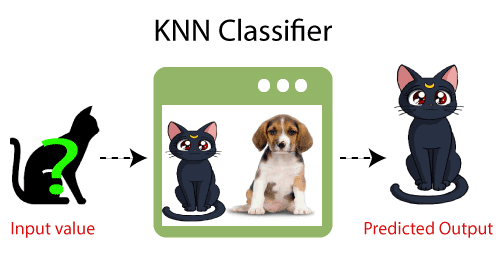

# Why do we need a K-NN Algorithm?
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:
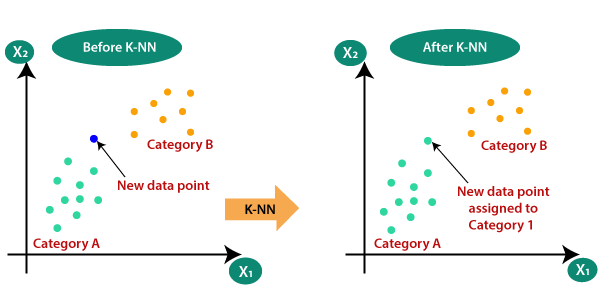 

# How does K-NN work?
Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name=['sepal-length','sepal-width','petal-length','petal-width','Class']
i1= pd.read_csv(r'Iris_training_dataset.csv',names= name)
i1

,sepal-length,sepal-width,petal-length,petal-width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x= i1[['sepal-length','sepal-width','petal-length','petal-width']]
y= i1[['Class']]

### **Spliting Data**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.1, random_state = 1) 

In [5]:
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier

### **Finding best estimator**

In [11]:
## search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
teach= KNeighborsClassifier()
k= list(range(1,31))

# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
para_grid= dict(n_neighbors= k)

kfold= StratifiedKFold(10)
grid= GridSearchCV(teach,para_grid, cv=kfold.split(X_train, Y_train), scoring='accuracy')

grid.fit(x,y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002E85C17C970>,
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
Each time, the n_neighbors parameter should be given a different value from the list
We can't give GridSearchCV just a list
We've to specify n_neighbors should take on 1 through 30
You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)
This is also called parallel programming

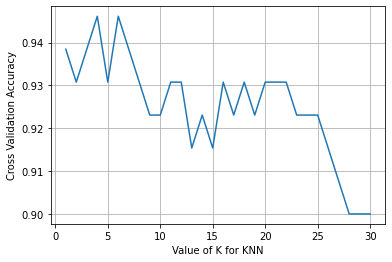

In [7]:
grid_mean_scores= grid.cv_results_['mean_test_score']
plt.plot(k,  grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.grid()

In [8]:
n = grid.best_estimator_
n

KNeighborsClassifier(n_neighbors=4)

### **Model buiding fitting and prediction**

In [9]:
knn=KNeighborsClassifier(n_neighbors= grid.best_index_+1)
knn.fit(X_train, Y_train)
pred= knn.predict(X_test)
print('Predicted Value: ', pred)

Predicted Value:  ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
